# Credit Card Fraud Detection using Machine Learning

## importing libraries

In [1]:
!pip install pandas
import pandas as pd
!pip install tensorflow
!pip install nltk
import numpy as np
!pip install seaborn
import seaborn as sns
!pip install sklearn
!pip install keras
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from keras.models import Model, load_model
from keras.layers import Input, Dense
from termcolor import colored as cl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string
import matplotlib.ticker as ticker


import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN


## Loading dataset in Python and taking a first look

In [2]:
dat=pd.read_csv('C:/Users/q/Downloads/1creditcard.csv')
dat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


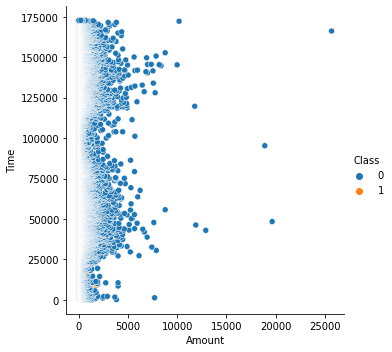

In [3]:
sns.relplot(x = "Amount", y = "Time", hue ="Class", data = dat)

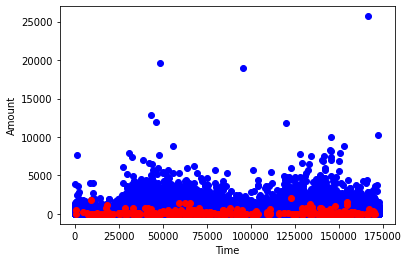

In [4]:
# Time VS Amount, red - fraud, blue - non-fraud. 
fraud_dat = dat[dat.Class == 1]
plt.scatter(dat.Time, dat.Amount, color = 'blue')
plt.xlabel('Time')
plt.ylabel('Amount')
# plt.show()
plt.scatter(fraud_dat.Time, fraud_dat.Amount, color = 'red')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [5]:
dat.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


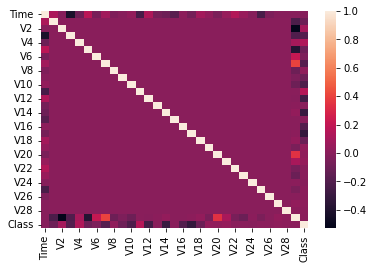

In [6]:
corr = dat.corr()
round(corr,2)
sns.heatmap(corr);

<AxesSubplot:xlabel='V28', ylabel='Density'>

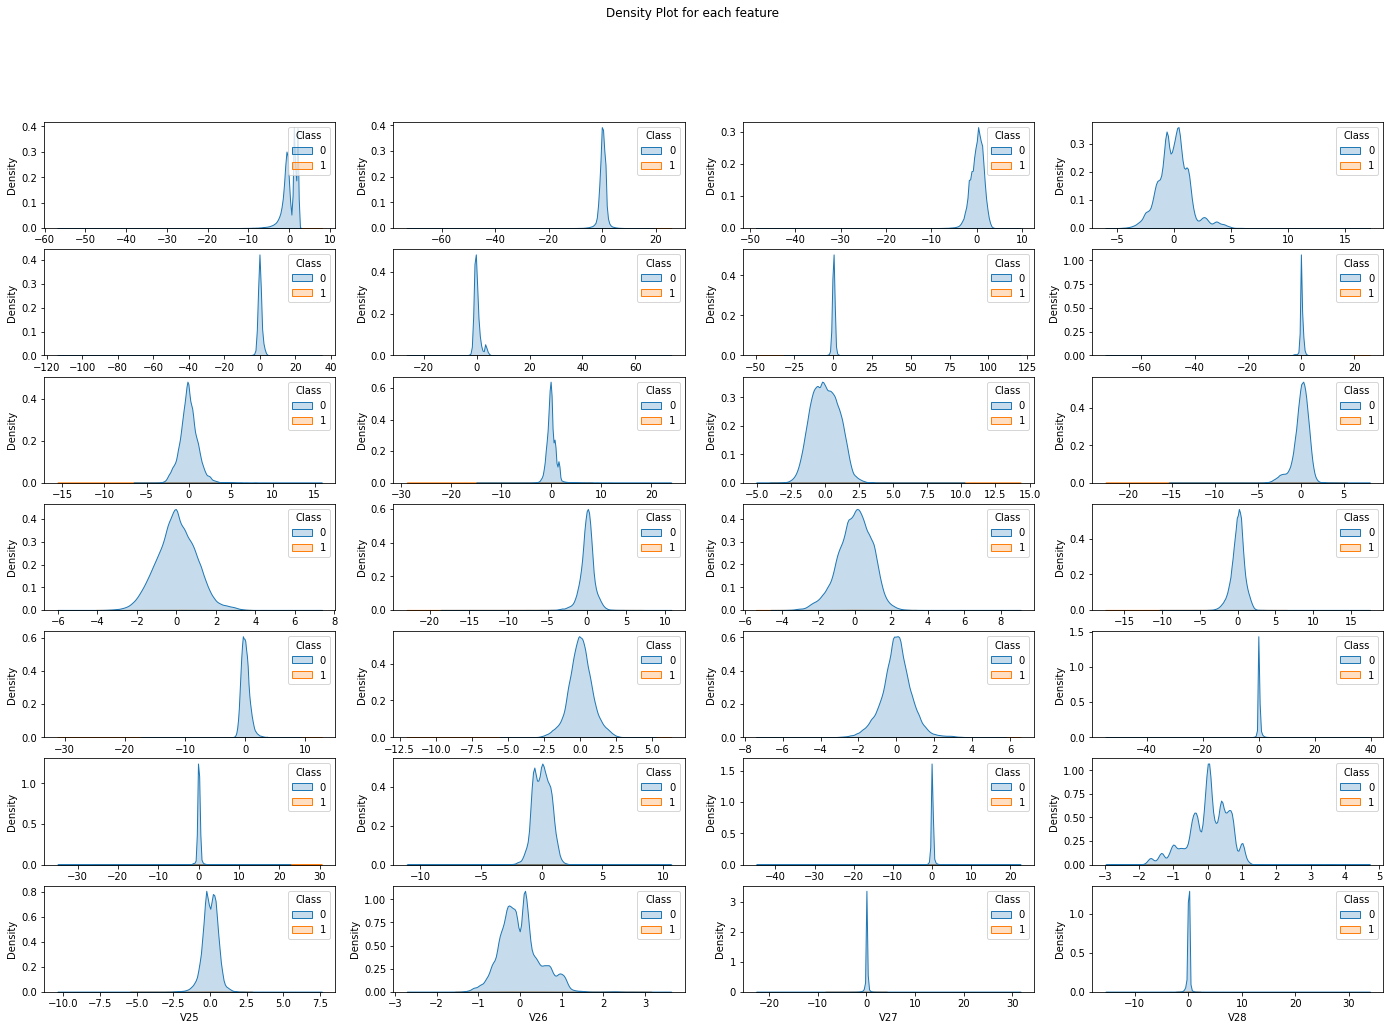

In [7]:
fig, axes = plt.subplots(7, 4, figsize=(24, 16))
fig.suptitle('Density Plot for each feature')

sns.kdeplot(ax=axes[0,0],x='V1', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[0,1],x='V2', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[0,2],x='V3', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[0,3],x='V4', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[1,0],x='V5', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[1,1],x='V6', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[1,2],x='V7', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[1,3],x='V8', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[2,0],x='V9', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[2,1],x='V10', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[2,2],x='V11', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[2,3],x='V12', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[3,0],x='V13', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[3,1],x='V14', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[3,2],x='V15', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[3,3],x='V16', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[4,0],x='V17', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[4,1],x='V18', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[4,2],x='V19', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[4,3],x='V20', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[5,0],x='V21', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[5,1],x='V22', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[5,2],x='V23', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[5,3],x='V24', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[6,0],x='V25', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[6,1],x='V26', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[6,2],x='V27', hue='Class', data= dat, shade=True)
sns.kdeplot(ax=axes[6,3],x='V28', hue='Class', data= dat, shade=True)

In [8]:
dat['Class'].value_counts()/dat['Class'].count()

0    0.998273
1    0.001727
Name: Class, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='count'>

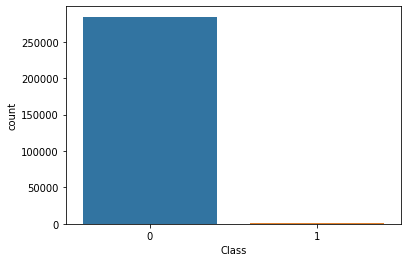

In [9]:
sns.countplot(x='Class', data=dat)

In [10]:
dat = dat.drop([ 'Time'], 1)
dat['Amount'] = StandardScaler().fit_transform(dat['Amount'].values.reshape(-1, 1))

C:\Users\q\AppData\Local\Temp\ipykernel_3224\1485037447.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dat = dat.drop([ 'Time'], 1)


## Splitting into train and test datasets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(dat.drop('Class',1) , dat['Class'], test_size=0.5, random_state=0)

C:\Users\q\AppData\Local\Temp\ipykernel_3224\3396225669.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(dat.drop('Class',1) , dat['Class'], test_size=0.5, random_state=0)


In [12]:
y_test.value_counts()/y_test.count()

0    0.998294
1    0.001706
Name: Class, dtype: float64

In [13]:
y_train.value_counts()/y_train.count()

0    0.998251
1    0.001749
Name: Class, dtype: float64

## First method: using autoencoder's logistic regression 
##### First we will train our autoencoder only on non fraudulent cases

In [14]:
X_train_normal = X_train[y_train==0]
X_train_fraud = X_train[y_train==1]

## Building an autoencoder with

1. an input layer with 29 neurons,
2. a hidden layer with 12 neurons,
3. an output layer with 29 neurons

In [15]:
input_layer = Input(shape=(29, ))
encoded = Dense(12,activation='tanh')(input_layer)
decoded = Dense(29,activation='sigmoid')(encoded)
autoencoder = Model(input_layer,decoded)

In [16]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
autoencoder.fit(X_train_normal, X_train_normal, epochs = 100, batch_size=128,
validation_data=(X_train_normal,X_train_normal))

Epoch 1/100
1111/1111 [==============================] - 5s 4ms/step - loss: 1.0017 - val_loss: 0.8853
Epoch 2/100
1111/1111 [==============================] - 4s 3ms/step - loss: 0.8595 - val_loss: 0.8418
Epoch 3/100
1111/1111 [==============================] - 4s 3ms/step - loss: 0.8320 - val_loss: 0.8237
Epoch 4/100
1111/1111 [==============================] - 4s 3ms/step - loss: 0.8179 - val_loss: 0.8124
Epoch 5/100
1111/1111 [==============================] - 4s 3ms/step - loss: 0.8083 - val_loss: 0.8045
Epoch 6/100
1111/1111 [==============================] - 4s 3ms/step - loss: 0.8013 - val_loss: 0.7983
Epoch 7/100
1111/1111 [==============================] - 4s 3ms/step - loss: 0.7959 - val_loss: 0.7936
Epoch 8/100
1111/1111 [==============================] - 4s 4ms/step - loss: 0.7918 - val_loss: 0.7899
Epoch 9/100
1111/1111 [==============================] - 4s 3ms/step - loss: 0.7885 - val_loss: 0.7871
Epoch 10/100
1111/1111 [==============================] - 4s 3ms/step - l

In [18]:
predictions = autoencoder.predict(X_train)
mse = np.mean(np.power(X_train - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_train})
error_df.groupby('true_class').describe()

reconstruction_error                                            \
                          count       mean        std       min       25%   
true_class                                                                  
0                      142154.0   0.768937   3.450878  0.032083  0.226084   
1                         249.0  30.141717  43.111020  0.167766  4.331587   

                                              
                  50%        75%         max  
true_class                                    
0            0.394642   0.648068  318.688995  
1           10.813042  27.416701  279.843399

In [19]:
nonfraud_cases = dat[dat.Class == 0]
fraud_cases = dat[dat.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Non-Fraud case amount stats', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Fraud case amount stats', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------------------------
Non-Fraud case amount stats
count    284315.000000
mean         -0.000234
std           0.999942
min          -0.353229
25%          -0.330640
50%          -0.265271
75%          -0.045177
max         102.362243
Name: Amount, dtype: float64
--------------------------------------------
Fraud case amount stats
count    492.000000
mean       0.135382
std        1.026242
min       -0.353229
25%       -0.349231
50%       -0.316247
75%        0.070128
max        8.146182
Name: Amount, dtype: float64
--------------------------------------------


#### As we can see above the error for non fraudulent case is lower than the error for fraudulent cases. We use a threshold of mean plus 3 sds to classify the test set.

In [20]:
test_predictions=autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - test_predictions, 2), axis=1)
y_pred=[(lambda er: 1 if er>=11.078922  else 0)(er) for er in mse]
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


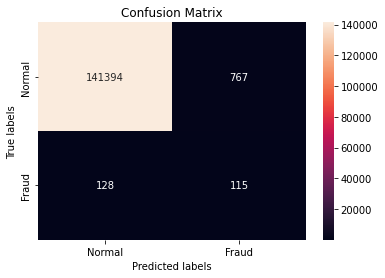

In [21]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)

ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);
ax.set(yticks=[0, 2], 
       xticks=[0.5, 1.5])
ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))

## Second method: using autoencoder's linear regression

In [22]:
df = pd.read_csv('C:/Users/q/Downloads/1creditcard.csv')

# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
occ

# Print the ratio of fraud cases
ratio_cases = occ/len(df.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 0.001727485630620034
Ratio of non-fraudulent cases: 0.9982725143693799


In [23]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    z: data columns (V1 - V28)
    a: lable column
    """
    z = df.iloc[:, 2:30].values
    a = df.Class.values
    return z, a

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
# Define a function to create a scatter plot of our data and labels
def plot_data(z: np.ndarray, a: np.ndarray):
    plt.scatter(z[a == 0, 0], z[a == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(z[a == 1, 0], z[a == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [25]:
# Create X and y from the prep_data function 
z, a = prep_data(df)

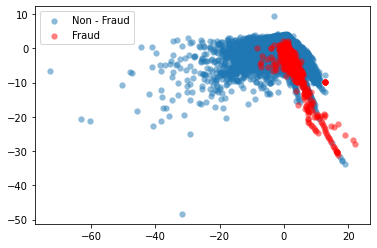

In [26]:
plt.scatter(df.V2[df.Class == 0], df.V3[df.Class == 0], label="Non - Fraud", alpha=0.5, linewidth=0.15)
plt.scatter(df.V2[df.Class == 1], df.V3[df.Class == 1], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Amount', ylabel='Time'>

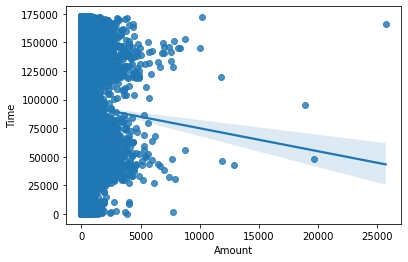

In [27]:
# Linear Regression plot
sns.regplot(x = 'Amount', # Horizontal axis
           y = 'Time', # Vertical axis
           data=df.copy())

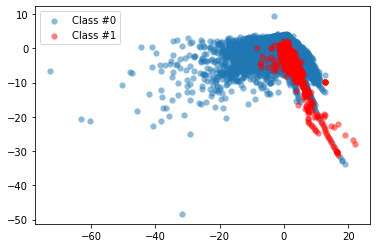

In [28]:
# Step 1: split the features and labels into train and test data
z_train, z_test, a_train, a_test = train_test_split(z, a, test_size=0.2)

# Step 2: Define which model to use
model = LinearRegression()

# Plot our data by running our plot data function on z and a
plot_data(z, a)

In [30]:
# Step 3: Fit the model to the training data
model.fit(z_train, a_train)

LinearRegression()

In [31]:
# Step 4: Obtain model predictions from the test data
a_predicted = model.predict(z_test)

# Step 5: Compare y_test to predictions and obtain performance metrics (r^2 score)
r2_score(a_test, a_predicted)

0.4972185755346441

In [32]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [33]:
df['flag_as_fraud'] = np.where(np.logical_and(df.V1 < -3, df.V3 < -5), 1, 0)

In [34]:
print('Confusion Matrix:')
pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])

Confusion Matrix:


Flagged Fraud,0,1
Actual Fraud,,
0,283089,1226
1,322,170


## Confusion matrix for both linear and logistic regression
### 1 - Linear Regression

In [35]:
print('Confusion Matrix:')
pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])

Confusion Matrix:


Flagged Fraud,0,1
Actual Fraud,,
0,283089,1226
1,322,170


### 2 - Logistic Regression

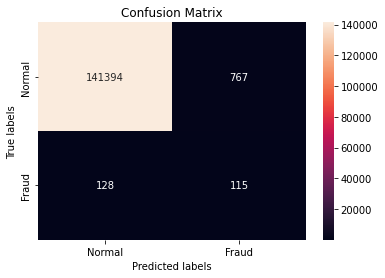

In [36]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)

ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);
ax.set(yticks=[0, 2], 
       xticks=[0.5, 1.5])
ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))